In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

### Improting the dataset

In [2]:
df = pd.read_table('SMSSpamCollection',header=None,encoding='utf-8')

C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [3]:
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
0    5572 non-null object
1    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### Data Preprocessing

In [4]:
df.rename(columns={0:'Type',1:'Message'},inplace=True)

In [5]:
df.head(5)

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


The column have be renamed for better understanding of the user

ham     4825
spam     747
Name: Type, dtype: int64
ham     0.865937
spam    0.134063
Name: Type, dtype: float64


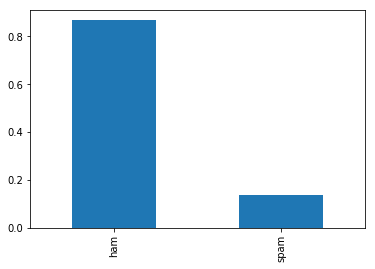

In [6]:
classes = df['Type']
print(classes.value_counts())
print(classes.value_counts()/len(classes))
(classes.value_counts()/len(classes)).plot.bar()

More than 86% of the messages are useful and only 14 messages can be considered spam

#### LabelEncoding the Types

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)
print(classes[:5])
print(Y[:5])

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Type, dtype: object
[0 0 1 0 0]


The column type has been LabelEncoded for training the model

**Separating the Messages for further processing**

In [8]:
text = df['Message']
print(text[:10])
type(text)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: Message, dtype: object


pandas.core.series.Series

### Regular Expression

The messages have been randomly written and there is no guarantee of correct spelling and grammer.
This can be challenging to process. To overcome such obstacles we must separate the messages with e-mails, phone numbers and urls and other numerical symbols.

Some common regular expression metacharacters - copied from wikipedia

^ Matches the starting position within the string. In line-based tools, it matches the starting position of any line.

. Matches any single character (many applications exclude newlines, and exactly which characters are considered newlines is flavor-, character-encoding-, and platform-specific, but it is safe to assume that the line feed character is included). Within POSIX bracket expressions, the dot character matches a literal dot. For example, a.c matches "abc", etc., but [a.c] matches only "a", ".", or "c".

[ ] A bracket expression. Matches a single character that is contained within the brackets. For example, [abc] matches "a", "b", or "c". [a-z] specifies a range which matches any lowercase letter from "a" to "z". These forms can be mixed: [abcx-z] matches "a", "b", "c", "x", "y", or "z", as does [a-cx-z]. The - character is treated as a literal character if it is the last or the first (after the ^, if present) character within the brackets: [abc-], [-abc]. Note that backslash escapes are not allowed. The ] character can be included in a bracket expression if it is the first (after the ^) character: []abc].

[^ ] Matches a single character that is not contained within the brackets. For example, [^abc] matches any character other than "a", "b", or "c". [^a-z] matches any single character that is not a lowercase letter from "a" to "z". Likewise, literal characters and ranges can be mixed.

$ Matches the ending position of the string or the position just before a string-ending newline. In line-based tools, it matches the ending position of any line.

( ) Defines a marked subexpression. The string matched within the parentheses can be recalled later (see the next entry, \n). A marked subexpression is also called a block or capturing group. BRE mode requires ( ).

\n Matches what the nth marked subexpression matched, where n is a digit from 1 to 9. This construct is vaguely defined in the POSIX.2 standard. Some tools allow referencing more than nine capturing groups.

* Matches the preceding element zero or more times. For example, abc matches "ac", "abc", "abbbc", etc. [xyz] matches "", "x", "y", "z", "zx", "zyx", "xyzzy", and so on. (ab)* matches "", "ab", "abab", "ababab", and so on.

{m,n} Matches the preceding element at least m and not more than n times. For example, a{3,5} matches only "aaa", "aaaa", and "aaaaa". This is not found in a few older instances of regexes. BRE mode requires {m,n}.

In [9]:
# Replace email addresses with 'email'
processed = text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
processed = processed.str.replace(r'£|\$', 'moneysymb')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumbr')
    
# Replace numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '')

# making all the msgs lower_case because Hello,HELLO and hello are all the same
processed = processed.str.lower()

print(processed.head(5))
print(processed.tail(5))

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in numbr a wkly comp to win fa cup ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: Message, dtype: object
5567    this is the numbrnd time we have tried numbr c...
5568                    will b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, dtype: object


In [10]:
# removing the stop words from the msgs as they don't add any useful info

from nltk.corpus import stopwords

words = set(stopwords.words('english'))

processed = processed.apply(lambda x:' '.join(term for term in x.split(' ') if term not in words))

In [11]:
# removing the stem in words
stem = nltk.PorterStemmer()

processed = processed.apply(lambda x:' '.join(stem.stem(term) for term in x.split()))

print(processed[:5])

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri numbr wkli comp win fa cup final tk...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: Message, dtype: object


In [12]:
# tokenizing all the msgs for word frequency
from nltk.tokenize import word_tokenize
 
all_words = []

for msg in processed:
    words = word_tokenize(msg)
    for word in words:
        all_words.append(word)
        
all_words = nltk.FreqDist(all_words)

#printing the neseccary Info
print("The total Number of unique words : {}".format(len(all_words)))

print("The Most common words in all the unique words: {}".format(all_words.most_common(15)))

The total Number of unique words : 6562
The Most common words in all the unique words: [(u'numbr', 2961), (u'u', 1207), (u'call', 679), (u'go', 456), (u'get', 451), (u'ur', 391), (u'gt', 318), (u'lt', 316), (u'come', 304), (u'ok', 293), (u'free', 284), (u'day', 276), (u'know', 275), (u'love', 266), (u'like', 261)]


**Since we have a very large dataset we are only going to use the 1500 most common words to train our algo**

In [13]:
word_feature = list(all_words.keys())[:1500]

In [14]:
# defining a fucntion to find the common words in a particular msg

def find_feat(msg):
    words = word_tokenize(msg)
    dic = {}
    for word in word_feature:
        dic[word] = (word in words)
    return dic

In [15]:
dic = find_feat(processed[0])
for key, value in dic.items():
    if value == True:
        print(key)

avail
buffet
world
great


In [16]:
# generating hte dictionary for every msg in the data set
messages = zip(processed,Y)

# defining the reproducable sedd
seed = 1
np.random.seed = seed
np.random.shuffle(messages) 

feature_set = [(find_feat(text),label) for (text,label) in messages]

In [17]:
# spiliting the data in train and test
from sklearn.model_selection import train_test_split
training, testing = train_test_split(feature_set,test_size = 0.25, random_state=seed)

len(training),len(testing)

(4179, 1393)

### Importing the SklearnClassifier in NLTK

In [18]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 94.9748743719


### Importing the Necessary Classifiers

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 93.3237616655
Decision Tree Accuracy: 94.1852117732


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy: 94.544149318


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy: 94.615936827


C:\Users\HP\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGD Classifier Accuracy: 95.0466618808
Naive Bayes Accuracy: 94.0416367552
SVM Linear Accuracy: 94.9748743719


### Building the VotingClassifier for Ensembel Modelling

In [20]:
from sklearn.ensemble import VotingClassifier

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard', n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_model, testing)*100
print("Voting Classifier: Accuracy: {}".format(accuracy))

Voting Classifier: Accuracy: 94.9748743719


### Making class label prediction for testing set

In [21]:
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

### Printing a confusion matrix and a classification report

In [22]:

print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1213
           1       0.91      0.72      0.80       180

   micro avg       0.95      0.95      0.95      1393
   macro avg       0.93      0.85      0.89      1393
weighted avg       0.95      0.95      0.95      1393



predicted     
                  ham spam
actual ham       1200   13
       spam        51  129